In [11]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)


# Hello convolutional neural networks !

In the last part of this introductory laboratory, you'll "meet" a convolutional network for object classification. For now, consider it just as a black box that takes an image as input and outputs the 3-top predictions; however this network requires that the input data has the following properties: the size of the input image must be 224x224, the channels of the image should be stored in RGB format, the type of the data (of the numpy array) is float32 and the pixel values are normalized.

More specifically:
- resize the image by preserving the aspect ratio, such that its smallest dimension has 232 pixels;
- perform a central crop of the image of crop size equal to 224;
- rescale the pixels in the image to the interval [0.0, 1.0];
- normalize the pixel values using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] (subtract mean and then divide by the standard deviation).
- prior to feeding the image to model.predict() should be added such that the shape of the image is (1, 3, 224, 224) (channels first)

Your task is to pre-process the input images such that they are in the format requested by the network.

The predicted class is balloon with score 0.19%


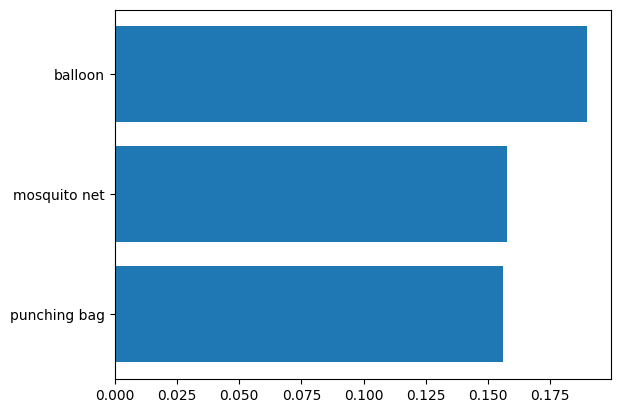

In [13]:
img_path = './images/elephant.jpg'

## TODO YOUR CODE HERE
img = cv2.imread(img_path)

# resize to 224x224
img = cv2.resize(img, (224, 224))

# rescale
img = img / 255.0

#normalize
mean = torch.tensor([0.485, 0.456, 0.406]).reshape(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).reshape(3, 1, 1)

# convert img to tensor
img = torch.tensor(img).permute(2, 0, 1).float()
img = (img - mean) / std


img.resize_(1, 3, 224, 224)


## END TODO YOUR CODE HERE

prediction = model(img).squeeze(0).softmax(0)

class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"The predicted class is {category_name} with score {100 * score:.2f}%")


# get the top k(=3) predictions
k = 3
with torch.no_grad():
  predictions_np = prediction.numpy()

  topk = np.argpartition(predictions_np, -k)[-k:]

  topk_categories = [weights.meta["categories"][class_id].lower() for class_id in topk]
  topk_scores = [predictions_np[idx]*100 for idx in topk]
  plt.barh(topk_categories, topk_scores)
  plt.show()

Apply different effects (crop it, lower the contrast, change the brightness) on the training image and see if you can "fool" the network.

Also, upload other images from your computer and see what the network predicts

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


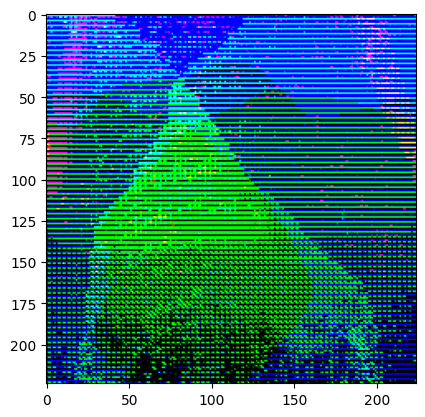

In [44]:
img_modfications = [
    lambda x: x,  # identity
    lambda x: x.flip(0),  # vertical flip
    lambda x: x.flip(1),  # horizontal flip
    lambda x: x.transpose(0, 1),  # transpose
    lambda x: x.flip(0).transpose(0, 1),  # transpose + vertical flip
    lambda x: x.flip(1).transpose(0, 1),  # transpose + horizontal flip
    lambda x: x-0.5,  # subtract 0.5
    lambda x: x*2,  # double
]

img_copy = img.clone()

# apply all modifications
for img_mod in img_modfications:
    img_copy = img_mod(img_copy)

#plot the modified image
img_copy=img_copy.reshape(1,3,224,224)
print(img_copy.shape)
print(img.shape)

plt.imshow(img_copy.squeeze(0).permute(1, 2, 0))


The predicted class is balloon with score 0.22%


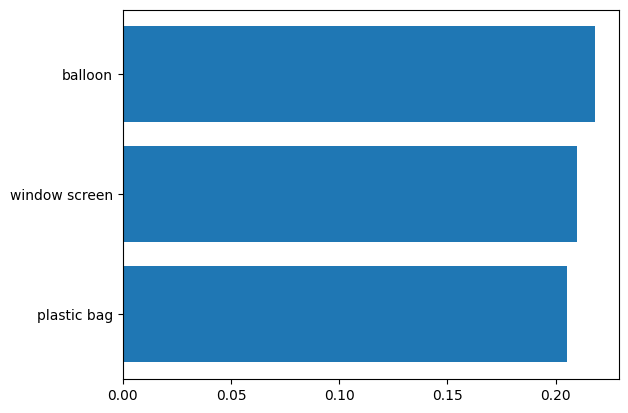

In [45]:
prediction = model(img_copy).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"The predicted class is {category_name} with score {100 * score:.2f}%")


# get the top k(=3) predictions
k = 3
with torch.no_grad():
  predictions_np = prediction.numpy()

  topk = np.argpartition(predictions_np, -k)[-k:]

  topk_categories = [weights.meta["categories"][class_id].lower() for class_id in topk]
  topk_scores = [predictions_np[idx]*100 for idx in topk]
  plt.barh(topk_categories, topk_scores)
  plt.show()